In [1]:
from ensembles import VanillaEnsemble, BootstrapEnsemble
from datasets import make_dataset, make_cross_validation_dataset
from plot import plot_dataset, plot_prediction
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 4]
from evaluation import evaluate_model
import tensorflow as tf

In [2]:
data = make_dataset(train_p=0.8)

X = data['X']
y = data['y']
X_test = data['X_test']
y_test = data['y_test']
generate_sinoid = data['generating']
#sorted_index = data['train_index']
sorted_index = data['shuffle_index']
#test_index = data['test_ind']

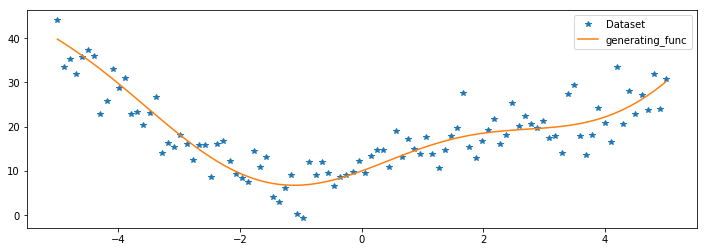

In [3]:
plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

# initialise Ensembles

In [4]:
num_epochs = 300
ensemble = [{'num_neurons':[10,10,10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10,10,10,10],'num_epochs':num_epochs}]#,'optimizer':tf.train.AdamOptimizer}]
        

vanilla = VanillaEnsemble(estimator_stats = ensemble)


bootstrap_ensemble = {'num_neurons':[10,10,10,10,10],'num_epochs':num_epochs}#,'optimizer':tf.train.AdamOptimizer}

bootstrap = BootstrapEnsemble(estimator_stats= bootstrap_ensemble)

In [5]:
def get_mean_var(pred_dict):
    return pred_dict['means'],pred_dict['stds']
    

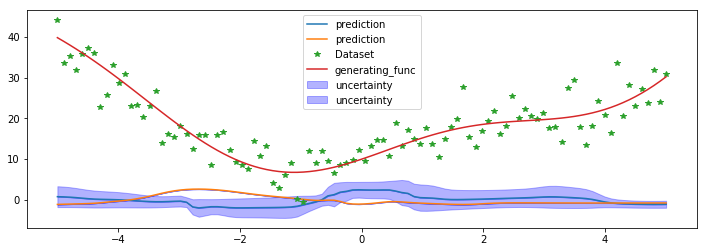

In [6]:
vanilla_pred_dict = vanilla.predict(X)
vanilla_preds, vanilla_var = get_mean_var(vanilla_pred_dict)
bootstrap_pred_dict = bootstrap.predict(X)
bootstrap_preds, bootstrap_var = get_mean_var(bootstrap_pred_dict)
plot_prediction(X,
                vanilla_preds,
                sorted_index,
                vanilla_var)

plot_prediction(X,
                bootstrap_preds,
                sorted_index,
                bootstrap_var)

plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

# Training

In [7]:
vanilla.train(X,y)
bootstrap.train(X,y)

53
47
45
53
46
49
50
51
44
53


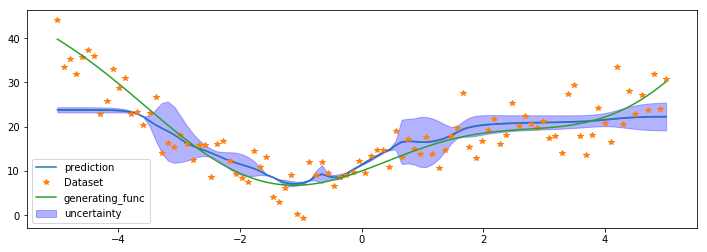

In [8]:
vanilla_pred_dict = vanilla.predict(X)
vanilla_preds, vanilla_var = get_mean_var(vanilla_pred_dict)
bootstrap_pred_dict = bootstrap.predict(X)
bootstrap_preds, bootstrap_var = get_mean_var(bootstrap_pred_dict)
plot_prediction(X,
                vanilla_preds,
                sorted_index,
                vanilla_var**2)
plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

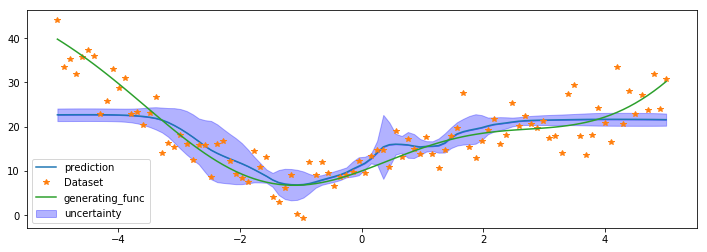

In [9]:

plot_prediction(X,
                bootstrap_preds,
                sorted_index,
                bootstrap_var**2)

plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

In [10]:
evaluate_model(X,y,vanilla_preds,var=vanilla_var**2)

RSME is 5.230095409602515
COVERAGE PROBABILITY is 0.31
COVERAGE/MEAN_VAR is 0.17345480808815467


In [11]:
evaluate_model(X,y,bootstrap_preds,var=bootstrap_var**2)

RSME is 5.554283835983956
COVERAGE PROBABILITY is 0.38
COVERAGE/MEAN_VAR is 0.16503613877471734


# Hic sunt dracones

In [12]:
from ensembles import GaussianNetworkEnsemble, GaussianLRNetworkEnsemble


In [13]:
gauss = GaussianNetworkEnsemble(estimator_stats = ensemble)

In [14]:
gauss_dict = gauss.predict(X)

In [15]:
mean,std = get_mean_var(gauss_dict)

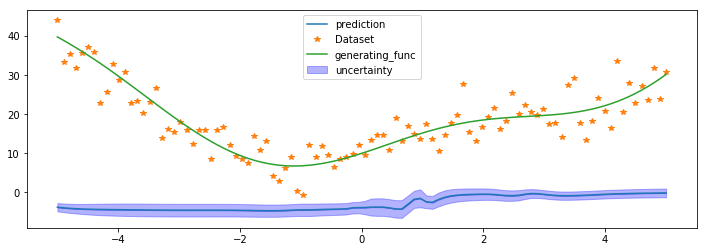

In [16]:
plot_prediction(X,
                mean,
                sorted_index,
                std)
plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

In [17]:
gauss.train(X,y)

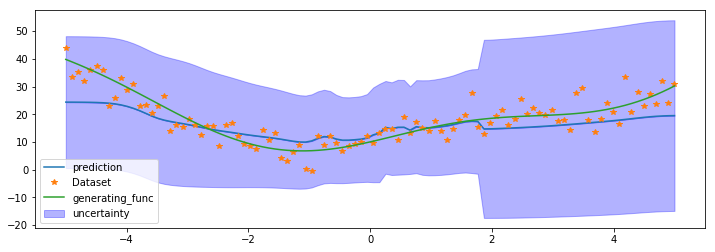

In [18]:
gauss_dict = gauss.predict(X)
mean,std = get_mean_var(gauss_dict)
plot_prediction(X,
                mean,
                sorted_index,
                std)
plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

# Learning Rate stuff


In [19]:
gauss_lr = GaussianLRNetworkEnsemble(estimator_stats = ensemble)

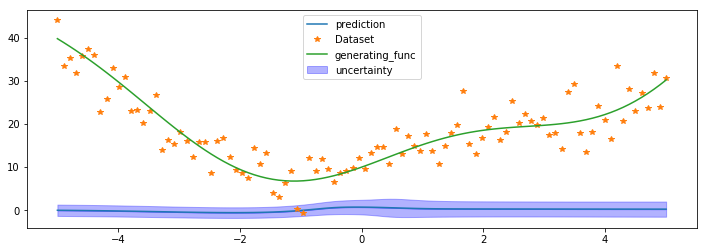

In [20]:
gauss_lr_dict = gauss_lr.predict(X)
mean,std = get_mean_var(gauss_lr_dict)
plot_prediction(X,
                mean,
                sorted_index,
                std)
plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

In [21]:
gauss_lr.train(X,y)

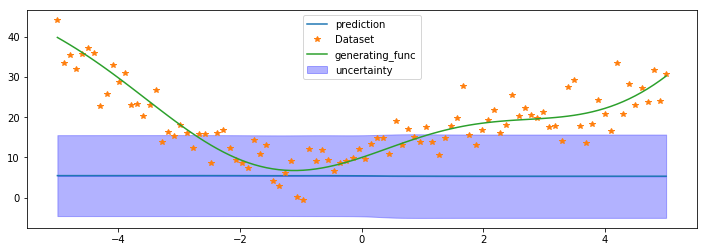

In [22]:
gauss_lr_dict = gauss_lr.predict(X)
mean,std = get_mean_var(gauss_lr_dict)
plot_prediction(X,
                mean,
                sorted_index,
                std)
plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)